# AirBnB Fair Valuation

Welcome to Airbnb Analysis Corp.! Your task is to set the competitive **daily accomodation rate** for a client's house in Bondi Beach. The owner currently charges $500. We have been tasked to estimate a **fair value** that the owner should be charging. The house has the following characteristics and constraints. While developing this model you came to realise that Airbnb can use your model to estimate the fair value of any property on their database, your are effectively creating a recommendation model for all prospective hosts!


1. The owner has been a host since **August 2010**
1. The location is **lon:151.274506, lat:33.889087**
1. The current review score rating **95.0**
1. Number of reviews **53**
1. Minimum nights **4**
1. The house can accomodate **10** people.
1. The owner currently charges a cleaning fee of **370**
1. The house has **3 bathrooms, 5 bedrooms, 7 beds**.
1. The house is available for **255 of the next 365 days**
1. The client is **verified**, and they are a **superhost**.
1. The cancelation policy is **strict with a 14 days grace period**.
1. The host requires a security deposit of **$1,500**


*All values strictly apply to the month of July 2018*

This is a problem statement obtained from a certification course in Udemy and is just used as a reference to get an idea. But the data used in this project is from the year 2023 and as such a few features might be different in the dataset. However, this project only focuses data cleaning, analysis and visualizations.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import re
import seaborn as sns
from pandas.plotting import scatter_matrix

## Loading the dataset for airbnb listings

The data is downloaded from airbnb site: http://insideairbnb.com/get-the-data/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/sydney_airbnb_listings.csv')

In [ ]:
pd.set_option('display.max_columns',None)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,20230313171229,2023-03-14,city scrape,An Oasis in the City,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...",https://a0.muscache.com/pictures/2797669/17895...,40855,https://www.airbnb.com/users/show/40855,Colleen,2009-09-23,"Potts Point, Australia","Recently retired, I've lived & worked on 4 con...",a few days or more,0%,50%,f,https://a0.muscache.com/im/users/40855/profile...,https://a0.muscache.com/im/users/40855/profile...,Potts Point,1.0,1.0,"['email', 'phone']",t,f,"Potts Point, New South Wales, Australia",Sydney,NaN,-33.86767,151.22497,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Hot water"", ""Cooking basics"", ""Single level ...",$65.00,90,180,90,90,180,180,90.0,180.0,NaN,t,8,38,68,343,2023-03-14,195,0,0,2009-12-05,2020-03-13,4.59,4.76,4.30,4.80,4.76,4.82,4.71,NaN,f,1,0,1,0,1.21
1,15253,https://www.airbnb.com/rooms/15253,20230313171229,2023-03-13,city scrape,Unique Designer Rooftop Apartment in City Loca...,You will be staying in a unique duplex apartme...,The location is really central and there is nu...,https://a0.muscache.com/pictures/miso/Hosting-...,59850,https://www.airbnb.com/users/show/59850,Morag,2009-12-03,"Sydney, Australia",I am originally Scottish but I have made Sydne...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/730ee...,https://a0.muscache.com/im/pictures/user/730ee...,Darlinghurst,2.0,6.0,"['email', 'phone']",t,t,"Darlinghurst, New South Wales, Australia",Sydney,NaN,-33.87964,151.21680,Private room in condo,Private room,2,NaN,1 private bath,1.0,1.0,"[""Coffee maker"", ""Hot water"", ""Long term stays...",$105.00,1,90,1,1,1125,1125,1.0,1125.0,NaN,t,2,6,11,179,2023-03-13,482,84,8,2012-02-23,2023-03-06,4.50,4.63,4.47,4.80,4.72,4.75,4.53,PID-STRA-24061-7,t,2,1,1,0,3.58
2,135691,https://www.airbnb.com/rooms/135691,20230313171229,2023-03-13,city scrape,Private room for your Bondi holiday,Stylish and eclectically decorated two bedroom...,The area:<br />A brisk 10 minute walk to Bondi...,https://a0.muscache.com/pictures/10544861/d342...,501973,https://www.airbnb.com/users/show/501973,Francine,2011-04-11,"Bondi Beach, Australia",Hi and welcome\r\n\r\nI am a pretty chilled pe...,within a few hours,100%,57%,f,https://a0.muscache.com/im/pictures/user/b0415...,https://a0.muscache.com/im/pictures/user/b0415...,Bondi,1.0,3.0,"['email', 'phone']",t,t,"Bondi, New South Wales, Australia",Waverley,NaN,-33.88823,151.26238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Conditioner"", ""Hot water"", ""Bathtub"", ""Outdo...",$200.00,3,1125,3,3,1125,1125,3.0

## Exploratory Data Analysis

In [ ]:
# For this particular project, only few features are required. The rest can be discarded.
include=['price','host_since','latitude','longitude','host_neighbourhood','review_scores_rating','number_of_reviews',
         'minimum_nights','room_type','accommodates','bathrooms_text','bedrooms',
         'beds','availability_365','host_is_superhost','host_identity_verified']

df = df[include]
df.head()

,price,host_since,latitude,longitude,host_neighbourhood,review_scores_rating,number_of_reviews,minimum_nights,room_type,accommodates,bathrooms_text,bedrooms,beds,availability_365,host_is_superhost,host_identity_verified
0,$65.00,2009-09-23,-33.86767,151.22497,Potts Point,4.59,195,90,Private room,1,1 shared bath,1.0,1.0,343,f,f
1,$105.00,2009-12-03,-33.87964,151.21680,Darlinghurst,4.50,482,1,Private room,2,1 private bath,1.0,1.0,179,t,t
2,$200.00,2011-04-11,-33.88823,151.26238,Bondi,4.76,35,3,Private room,2,1 shared bath,1.0,1.0,179,f,t
3,$130.00,2010-04-22,-33.87888,151.21439,Darlinghurst,4.87,76,90,Entire home/apt,2,1 bath,1.0,1.0,0,f,t
4,$165.00,2010-11-06,-33.81748,151.23484,Mosman,4.59,367,2,Entire home/apt,4,1 bath,1.0,3.0,1,f,t


In [ ]:
df.shape

(22659, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22659 entries, 0 to 22658
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   22659 non-null  object 
 1   host_since              22657 non-null  object 
 2   latitude                22659 non-null  float64
 3   longitude               22659 non-null  float64
 4   host_neighbourhood      11027 non-null  object 
 5   review_scores_rating    17113 non-null  float64
 6   number_of_reviews       22659 non-null  int64  
 7   minimum_nights          22659 non-null  int64  
 8   room_type               22659 non-null  object 
 9   accommodates            22659 non-null  int64  
 10  bathrooms_text          22639 non-null  object 
 11  bedrooms                21302 non-null  float64
 12  beds                    22275 non-null  float64
 13  availability_365        22659 non-null  int64  
 14  host_is_superhost       22641 non-null

The price field has '$' in it, which needs to be removed and the field needs to be converted to float

In [ ]:
df['price']=df['price'].fillna("0")
df['price']=df['price'].apply(lambda x:(re.compile('[^0-9eE.]').sub('',x) if len(x)>0 else 0)).astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22659 entries, 0 to 22658
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   22659 non-null  float64
 1   host_since              22657 non-null  object 
 2   latitude                22659 non-null  float64
 3   longitude               22659 non-null  float64
 4   host_neighbourhood      11027 non-null  object 
 5   review_scores_rating    17113 non-null  float64
 6   number_of_reviews       22659 non-null  int64  
 7   minimum_nights          22659 non-null  int64  
 8   room_type               22659 non-null  object 
 9   accommodates            22659 non-null  int64  
 10  bathrooms_text          22639 non-null  object 
 11  bedrooms                21302 non-null  float64
 12  beds                    22275 non-null  float64
 13  availability_365        22659 non-null  int64  
 14  host_is_superhost       22641 non-null

<Axes: ylabel='price'>

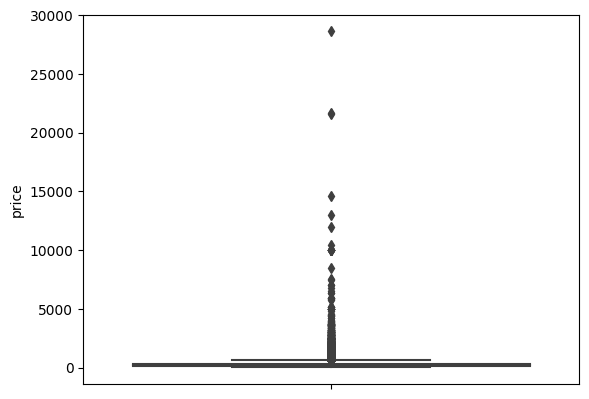

In [ ]:
# Plot and remove high price values that are outliers
sns.boxplot(y=df['price'])

In [ ]:
df['price'].describe()

count    22659.000000
mean       300.860453
std        563.981566
min         14.000000
25%         98.000000
50%        179.000000
75%        305.000000
max      28613.000000
Name: price, dtype: float64

The min value and max values are 14 and 28613 which are two extremes and hence it can be assumed that data can be considered as outliers. The kurtosis and skew of the field will help with data analysis.

In [ ]:
df['price'].kurtosis()

557.4390303841107

In [ ]:
df['price'].skew()

16.878266281403853

The kurtosis and skew values show that the data has high value outliers which can be removed by considering 99 percentile of data by removing the bottom and top 0.25% of the price values.

In [ ]:
# Removing all price values over 99 percentile
df=df[df['price']<df['price'].quantile(0.99)].reset_index(drop=True)

In [ ]:
# Checking skew and kurtosis once again
print(df['price'].skew())
print(df['price'].kurtosis())

2.90456718567518
10.458992065561288


In [ ]:
df.isnull().sum()

price                         0
host_since                    2
latitude                      0
longitude                     0
host_neighbourhood        11545
review_scores_rating       5400
number_of_reviews             0
minimum_nights                0
room_type                     0
accommodates                  0
bathrooms_text               20
bedrooms                   1351
beds                        378
availability_365              0
host_is_superhost             3
host_identity_verified        2
dtype: int64

The data in bathrooms_text needs to be converted to numerical value inorder to depict the no of bathrooms offered

In [ ]:
df['bathrooms_text'].value_counts()

1 bath               10564
2 baths               3601
1 shared bath         2750
1 private bath        1537
1.5 baths              957
3 baths                768
2.5 baths              739
2 shared baths         369
1.5 shared baths       368
3.5 baths              220
4 baths                161
3 shared baths          63
2.5 shared baths        61
4.5 baths               47
0 shared baths          44
5 baths                 33
0 baths                 33
Half-bath               27
Shared half-bath        15
4 shared baths          15
3.5 shared baths        10
5.5 baths                9
Private half-bath        6
4.5 shared baths         3
6 shared baths           2
6 baths                  2
7 baths                  1
6.5 baths                1
5 shared baths           1
7 shared baths           1
11 baths                 1
5.5 shared baths         1
7.5 baths                1
Name: bathrooms_text, dtype: int64

In [ ]:
# Inorder to get the no of bathrooms, the values are split and 'Half-bath','Private half-bath','Shared half-bath' are considered as 0.5
df['bathrooms_text']=df['bathrooms_text'].fillna("0").replace(['Half-bath','Private half-bath','Shared half-bath'],'0.5')
df['bathrooms']=df['bathrooms_text'].apply(lambda x: float(x.split(' ')[0]))
df.head()

,price,host_since,latitude,longitude,host_neighbourhood,review_scores_rating,number_of_reviews,minimum_nights,room_type,accommodates,bathrooms_text,bedrooms,beds,availability_365,host_is_superhost,host_identity_verified,bathrooms
0,65.0,2009-09-23,-33.86767,151.22497,Potts Point,4.59,195,90,Private room,1,1 shared bath,1.0,1.0,343,f,f,1.0
1,105.0,2009-12-03,-33.87964,151.21680,Darlinghurst,4.50,482,1,Private room,2,1 private bath,1.0,1.0,179,t,t,1.0
2,200.0,2011-04-11,-33.88823,151.26238,Bondi,4.76,35,3,Private room,2,1 shared bath,1.0,1.0,179,f,t,1.0
3,130.0,2010-04-22,-33.87888,151.21439,Darlinghurst,4.87,76,90,Entire home/apt,2,1 bath,1.0,1.0,0,f,t,1.0
4,165.0,2010-11-06,-33.81748,151.23484,Mosman,4.59,367,2,Entire home/apt,4,1 bath,1.0,3.0,1,f,t,1.0


In [ ]:
df['bathrooms'].value_counts()

1.0     14851
2.0      3970
1.5      1325
3.0       831
2.5       800
3.5       230
4.0       176
0.0        97
4.5        50
0.5        48
5.0        34
5.5        10
6.0         4
7.0         2
6.5         1
11.0        1
7.5         1
Name: bathrooms, dtype: int64

There are data with 11 baths which is not normally possible. The rare occurences also needs to be removed for eg., only once or twice in the whole dataset.

In [ ]:
# Storing the count of each bathroom sizes in a variable
item_count = df.groupby(['bathrooms']).size()

# Storing the list of rare bathroom sizes in a variable, ie., those that have count less than 10
rare_items = list(item_count.loc[item_count<=10].index.values)

# Drop the data which are rare
df = df[~df['bathrooms'].isin(rare_items)].reset_index(drop=True)

# Sanity check
df['bathrooms'].value_counts()

1.0    14851
2.0     3970
1.5     1325
3.0      831
2.5      800
3.5      230
4.0      176
0.0       97
4.5       50
0.5       48
5.0       34
Name: bathrooms, dtype: int64

The 'city' of the airbnb can be extracted from the 'neighborhood' column

In [ ]:
df['host_neighbourhood'].value_counts().head(30)

Bondi Beach                      644
Surry Hills                      639
Manly                            635
North Bondi                      437
Darlinghurst                     374
Central Business District        338
Bondi                            322
Coogee                           303
Randwick                         252
Palm Beach                       209
Haymarket                        203
Redfern                          197
Maroubra                         180
Annandale/Leichhardt             175
Paddington                       174
Newtown/Enmore                   173
Waterloo                         163
Potts Point                      161
Elizabeth Bay/Rushcutters Bay    146
Pyrmont                          143
Avalon                           142
Kirribilli/Milsons Point         133
Mosman                           132
Neutral Bay                      126
Kingsford                        125
Bondi Junction                   122
Woollahra                        120
B

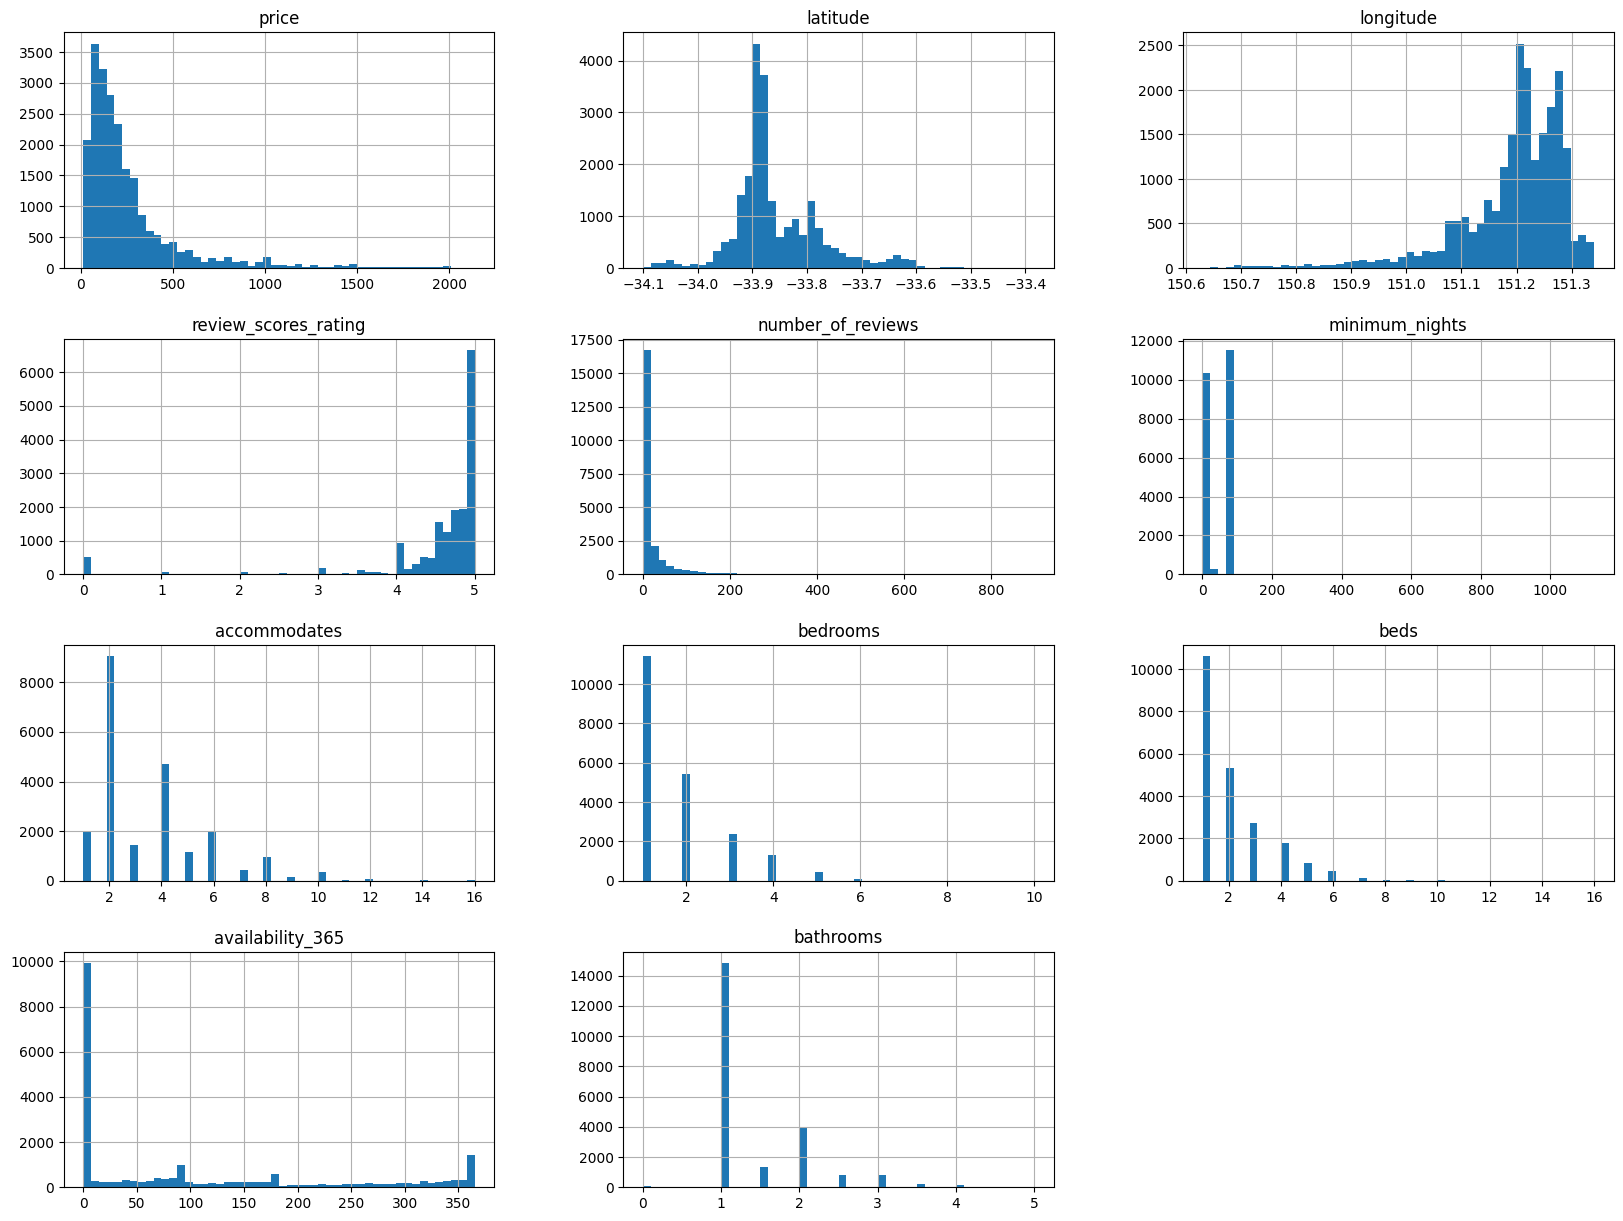

In [ ]:
df.hist(bins=50,figsize=(20,15))
plt.show()

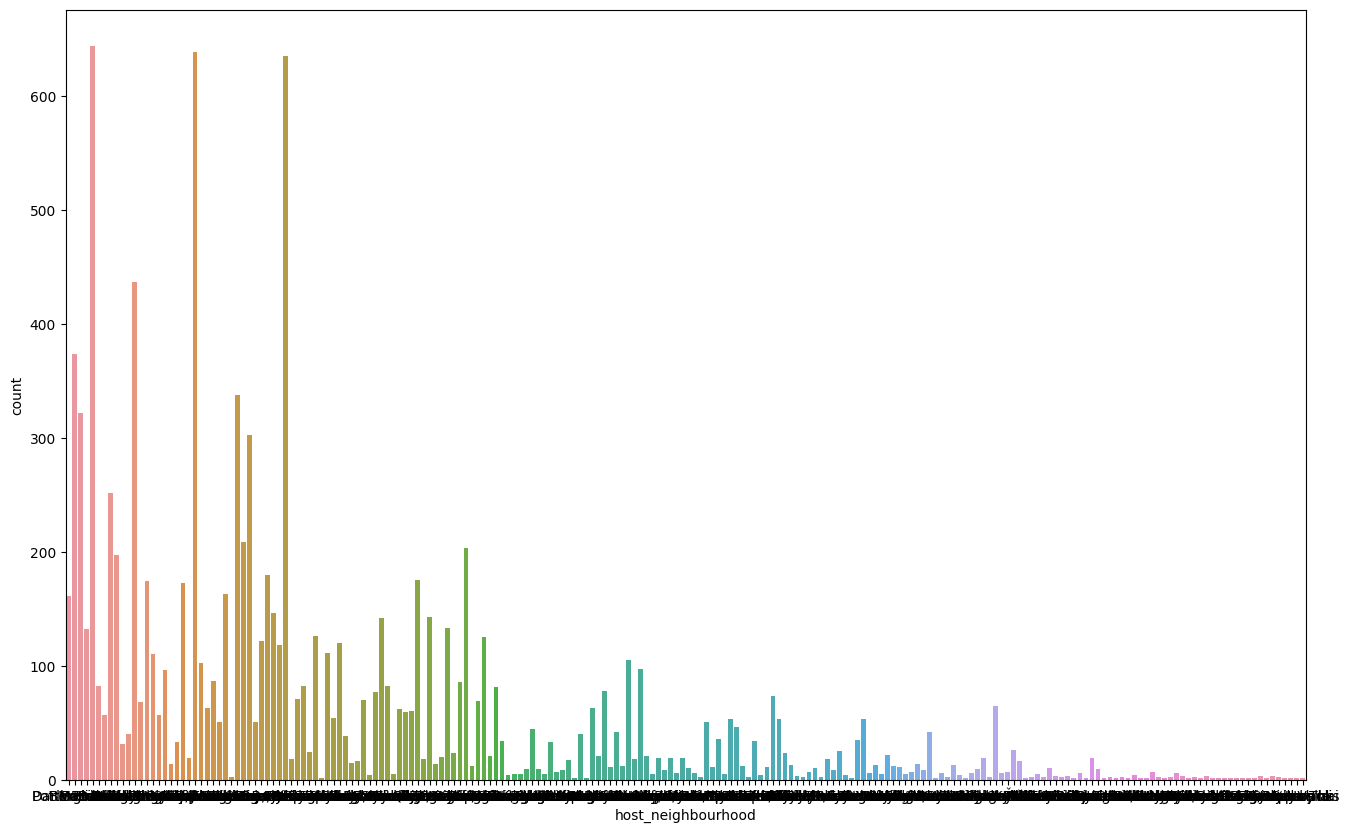

In [ ]:
# To plot the city which is under column name 'host_neighbourhood' using all data
plt.figure(figsize=(16,10))
ax=sns.countplot(x='host_neighbourhood',data=df)

In [ ]:
# For more efficiency, the top 20 host_neighbourhood is taken into consideration
city_20 = list(df['host_neighbourhood'].value_counts().head(20).index)
df = df[df['host_neighbourhood'].isin(city_20)].reset_index(drop=True)

In [ ]:
# To find the mean price of airbnb at each of the city
df.groupby('host_neighbourhood')['price'].mean()

host_neighbourhood
Annandale/Leichhardt             219.331429
Bondi                            195.704969
Bondi Beach                      279.714286
Central Business District        268.553254
Coogee                           319.795380
Darlinghurst                     367.877005
Elizabeth Bay/Rushcutters Bay    320.732877
Haymarket                        205.517241
Manly                            304.177953
Maroubra                         175.850000
Newtown/Enmore                   142.283237
North Bondi                      424.217391
Paddington                       266.637931
Palm Beach                       993.789474
Potts Point                      190.124224
Pyrmont                          226.398601
Randwick                         189.992063
Redfern                          172.289340
Surry Hills                      212.176839
Waterloo                         145.987730
Name: price, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

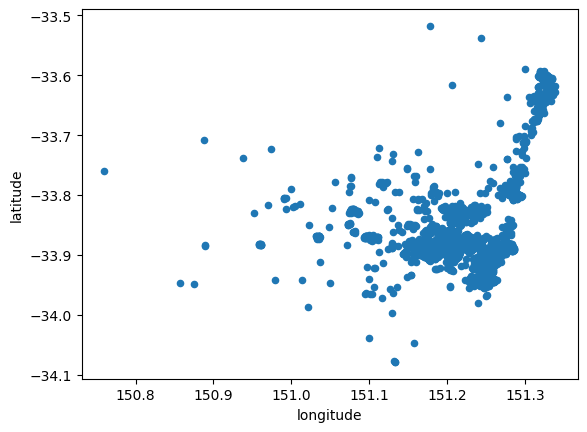

In [ ]:
# Plotting cordinates as a way of visualizing a map of the locations
df.plot(kind='scatter',x='longitude',y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

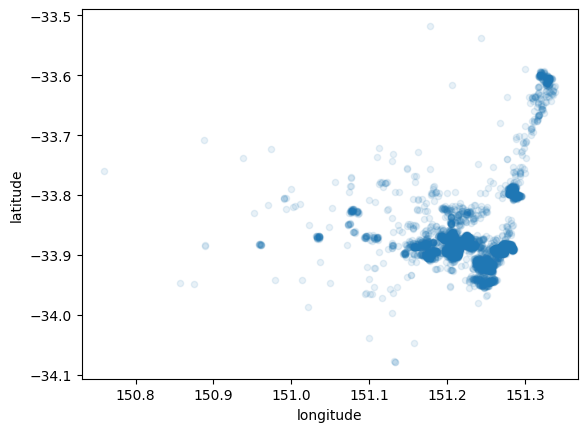

In [ ]:
# Inorder to plot the above data better
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

In [ ]:
# Narrow visual map and remove locations outside main area
df1 = df[(df['longitude']>151.14)&df['latitude']<-33.6].reset_index(drop=True)

df1 = df[df['latitude']>-33.96].reset_index(drop=True)

df1.head()

,price,host_since,latitude,longitude,host_neighbourhood,review_scores_rating,number_of_reviews,minimum_nights,room_type,accommodates,bathrooms_text,bedrooms,beds,availability_365,host_is_superhost,host_identity_verified,bathrooms
0,65.0,2009-09-23,-33.86767,151.22497,Potts Point,4.59,195,90,Private room,1,1 shared bath,1.0,1.0,343,f,f,1.0
1,105.0,2009-12-03,-33.87964,151.21680,Darlinghurst,4.50,482,1,Private room,2,1 private bath,1.0,1.0,179,t,t,1.0
2,200.0,2011-04-11,-33.88823,151.26238,Bondi,4.76,35,3,Private room,2,1 shared bath,1.0,1.0,179,f,t,1.0
3,130.0,2010-04-22,-33.87888,151.21439,Darlinghurst,4.87,76,90,Entire home/apt,2,1 bath,1.0,1.0,0,f,t,1.0
4,189.0,2011-06-22,-33.87249,151.22479,Potts Point,4.75,236,5,Entire home/apt,2,1 bath,1.0,1.0,39,f,t,1.0


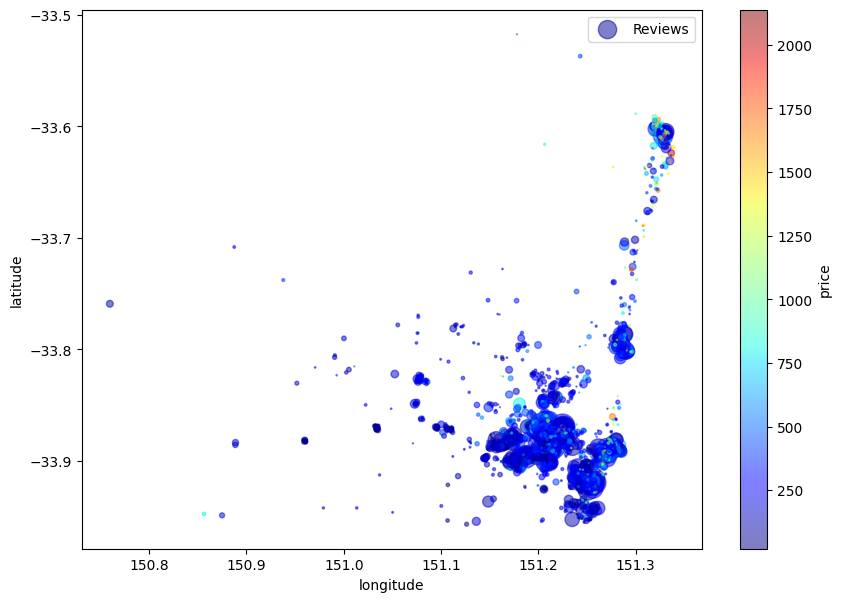

In [ ]:
df1.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,s=df1['number_of_reviews']/2,label="Reviews",figsize=(10,7),
        c='price',cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)

plt.legend()

In [ ]:
df1.shape

(5852, 17)

<ipython-input-129-2e1473b1f3d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

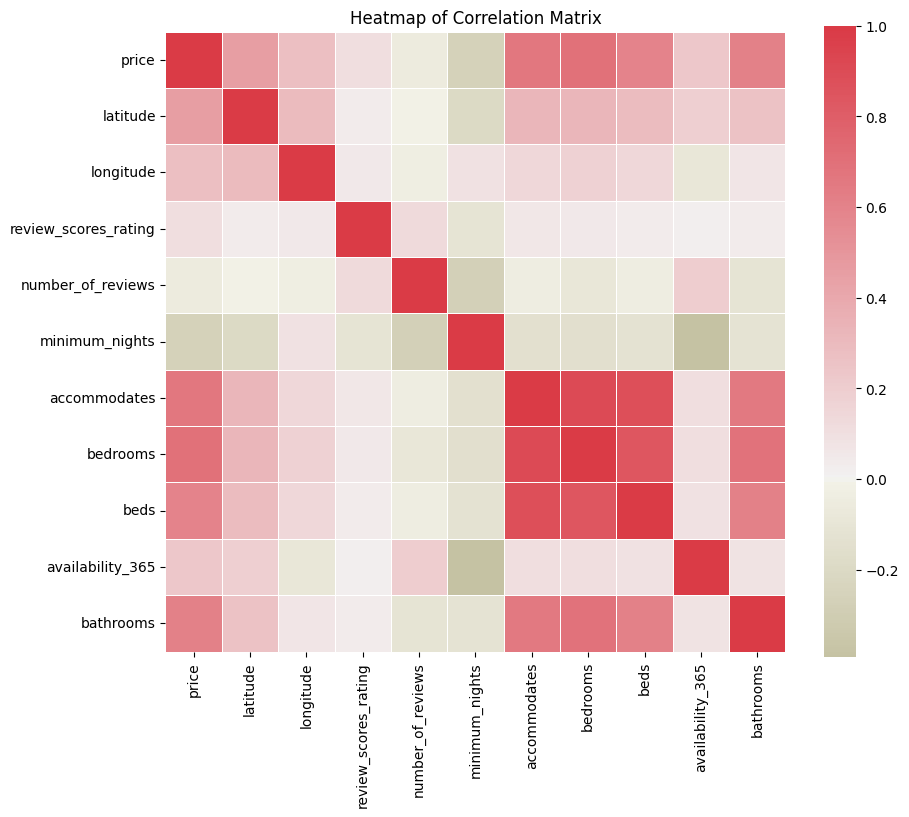

In [ ]:
# Exploring correlation matrix
corr_matrix = df1.corr()

# Plotting heatmap
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(440,10,as_cmap=True)

sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values,cmap=cmap,vmax=1,
            center=0,square=True,linewidths=0.5,cbar_kws={'shrink':.82})
plt.title('Heatmap of Correlation Matrix')

In [ ]:
corr_matrix['price'].sort_values(ascending=False)

price                   1.000000
bedrooms                0.696637
accommodates            0.666829
bathrooms               0.610477
beds                    0.594335
latitude                0.454755
longitude               0.279043
availability_365        0.229305
review_scores_rating    0.105035
number_of_reviews      -0.053994
minimum_nights         -0.261344
Name: price, dtype: float64

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='accommodates', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>,
        <Axes: xlabel='beds', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='accommodates', ylabel='bedrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bedrooms'>,
        <Axes: xlabel='beds', ylabel='bedrooms'>],
       [<Axes: xlabel='price', ylabel='accommodates'>,
        <Axes: xlabel='bedrooms', ylabel='accommodates'>,
        <Axes: xlabel='accommodates', ylabel='accommodates'>,
        <Axes: xlabel='bathrooms', ylabel='accommodates'>,
        <Axes: xlabel='beds', ylabel='accommodates'>],
       [<Axes: xlabel='price', ylabel='bathrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bathrooms'>,
        <Axes: xlabel='accommodates', ylabel='bathrooms'>,
        <Axes: xlabel=

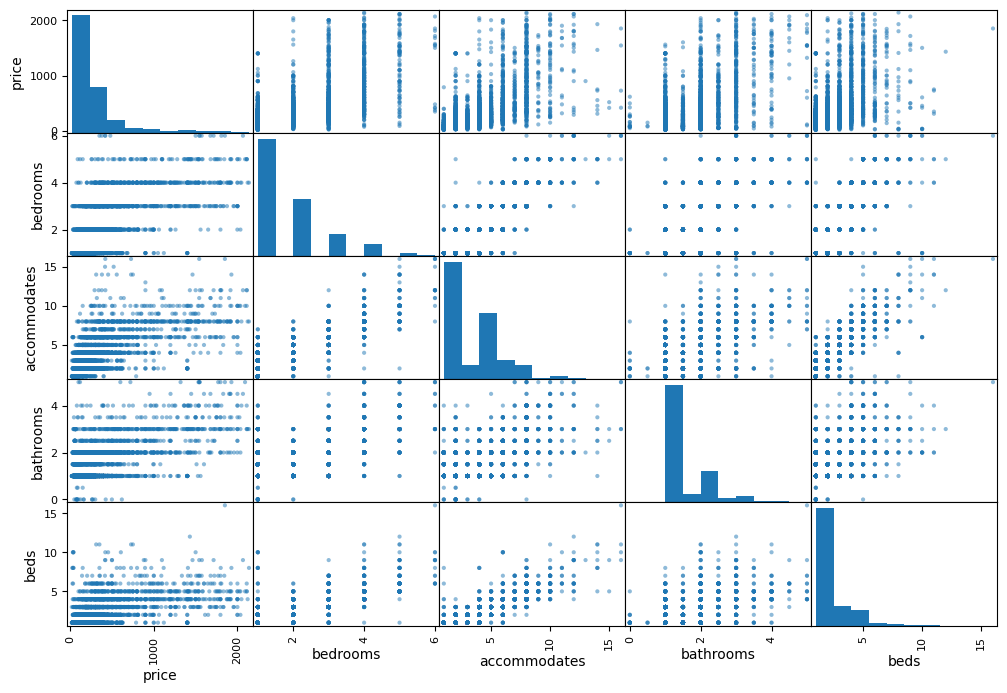

In [ ]:
attributes = ['price','bedrooms','accommodates','bathrooms','beds']
scatter_matrix(df1[attributes],figsize=(12,8))

<Axes: xlabel='accommodates', ylabel='price'>

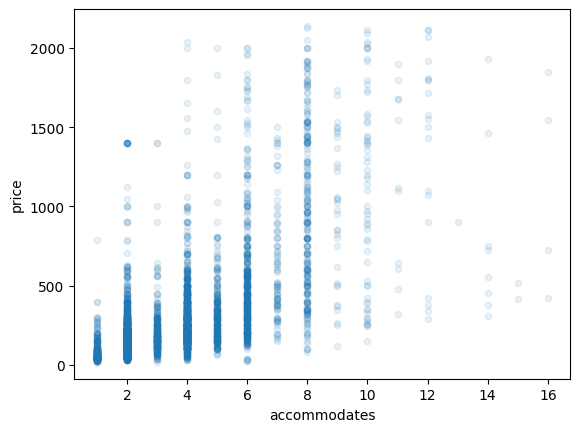

In [ ]:
df1.plot(kind='scatter',x='accommodates',y='price',alpha=0.1)